# **Q1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
df = pd.read_csv(URL_, header = None)
df = np.asmatrix(df, dtype = 'float64')
df

matrix([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
        [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
        [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
        ...,
        [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
        [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
        [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [ ]:
x1=df[:, :-1]
x1

matrix([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
        [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
        [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
        ...,
        [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
        [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
        [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
y1=df[:, -1]
y1

matrix([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
def perceptron(df, num_iter):
  features = df[:, :-1]   #definition above
  labels = df[:, -1]   #definition above

  # set weights to zero
  w = np.zeros(shape=(1, features.shape[1]+1))
  t_ = [] 
  for _ in range(num_iter):
    t = 0
    for x, label in zip(features, labels):
      x = np.insert(x,0,1)
      y = np.dot(w, x.transpose())
      if(y>0):
        target = 1.0
      else:
        target = 0.0
            
      delta = (label.item(0,0) - target)
            
      if(delta): # misclassified
        w += (delta * x)
        t += 1
        
    t_.append(t)
  return (w, t_)
             
num_iter = 10
w, t_ = perceptron(df, num_iter)

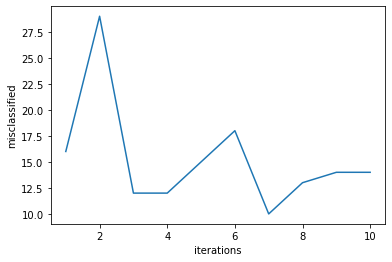

In [ ]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, t_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [ ]:
def predict(x1,w):
  pred = []
  for i in range(x1.shape[0]):
    if(np.dot(w,x1[i,:])>0):
      pred.append(1)
    else:
      pred.append(0)
  return pred;

In [ ]:
n = x1.shape[0]
idx = np.arange(0,n,dtype=np.int64)
np.random.shuffle(idx)
idx

array([346, 276, 813, ..., 613, 162, 866])

In [ ]:
train_idx = idx[:round(0.8*n)]
test_idx = idx[round(0.8*n):]
train_x = x1[train_idx,:]
train_y = y1[train_idx]
test_x = x1[test_idx,:]
test_y = y1[test_idx]

In [ ]:
acc = []
for i in range(5):
    n1 = train_x.shape[0]
    idx1 = np.arange(0,n1,dtype=np.int64)
    np.random.shuffle(idx1)
    train_idx1 = idx1[:round(0.8*n1)]
    val_idx1 = idx1[round(0.8*n1):]
    train_x1 = train_x[train_idx1,:]
    train_y1 = train_y[train_idx1]
    val_x1 = train_x[val_idx1,:]
    val_y1 = train_y[val_idx1]
    acc1 = (predict(val_x1,w) == val_y1).mean()
    acc.append(acc1)

acc_final = sum(acc)/5

ValueError: ignored

# **Q2**

In [ ]:
#np.random.seed(0)
data = 5 * np.random.randn(50) + 10
data

array([12.06455956, 14.19909053,  3.44950096, -0.9189577 ,  9.78938247,
       12.16377248,  4.96877693, 10.55372168,  8.6193227 , 12.7449212 ,
       10.84912001,  1.47864955,  9.44836871, 21.76543066, 16.93157307,
       14.86800335,  4.84195903, 17.25476044, 12.7381999 , 11.81268658,
       12.98227831, 11.25862838,  2.90061396, 11.19605252,  1.32656774,
       10.1015925 , 11.28990143,  9.25010433, 15.73006887, 14.39878098,
        5.88810302, 10.23624727, 13.363811  , 14.22945544,  3.34269243,
        9.07145321, 24.70051952,  5.56728154, 15.43772602, -1.95823246,
       18.8665221 , 12.52650087,  9.73232408, 20.79703891,  8.21793286,
       12.73378457,  9.20594056,  7.43902639, 12.17498895, 18.87457151])

In [ ]:
def normal(x, mean, sdev):
    return np.exp(-(x-mean)*(x-mean)/(2*sdev*sdev))/(np.sqrt(2*np.pi)*sdev)

def log_normal(x, mean, sdev):
    return -(x-mean)*(x-mean)/(2*sdev*sdev) - np.log(np.sqrt(2*np.pi)*sdev)

In [ ]:
class Distribution:

    def __init__(self, data, sdev):
        self.data = data
        self.n = data.shape[0]
        self.likelihood_sdev = sdev
        self.prior_mean = 25.0
        self.prior_sdev = 5.0

        prior_var = self.prior_sdev * self.prior_sdev
        likelihood_var = self.likelihood_sdev * self.likelihood_sdev
        posterior_var = prior_var * likelihood_var / (likelihood_var + self.n * prior_var)
        
        self.posterior_sdev = np.sqrt(posterior_var)
        self.posterior_mean = (self.prior_mean*likelihood_var + prior_var*self.data.sum()) / (likelihood_var + self.n * prior_var)

    def prior(self, theta):
        return normal(theta, self.prior_mean, self.prior_sdev)

    def log_prior(self, theta):
        return log_normal(theta,self.prior_mean,self.prior_sdev)

    def likelihood(self, theta):
        l = 1.0
        n = data.shape[0]
        for i in range(n):
            l *= normal(data[i], theta, self.likelihood_sdev)
        return l

    def log_likelihood(self, theta):
        ll = 1.0
        n = data.shape[0]
        for i in range(n):
            ll += log_normal(data[i], theta, self.likelihood_sdev)
        return ll

    def posterior(self, theta):
        return normal(theta, self.posterior_mean, self.posterior_sdev)

In [ ]:
a = Distribution(data, 25)

plotx = np.linspace(-20, 50, 1000) 
ploty1 = [a.prior(x) for x in plotx]
ploty2 = [a.log_likelihood(x) for x in plotx]
ploty3 = [a.posterior(x) for x in plotx]

plt.title("Prior")
plt.xlabel("theta")
plt.ylabel("p(theta)")
plt.plot(plotx,[a.prior(x) for x in plotx])
plt.show()

plt.xlabel("theta")
plt.ylabel("log p(y|theta)")
plt.title("Likelihood")
plt.plot(plotx, [a.log_likelihood(x) for x in plotx])
plt.show()

plt.xlabel("theta")
plt.ylabel("p(theta|y)")
plt.title("Posterior")
plt.plot(plotx, [a.posterior(x) for x in plotx])
plt.show()

In [ ]:
def metropolis(pi, dims, n_samples, lr=0.1, var=1):
    theta_ = np.random.randn(dims)*var
    samples = []
    while len(samples) < n_samples:
        theta = theta_ + np.random.randn(dims)*var
        ratio = pi(theta)/pi(theta_)
        if np.random.rand(1) < ratio:
            sample = theta
            theta_ = theta
            samples.append(sample)
        else:
            sample = theta_
            samples.append(sample)
    samples = np.array(samples)
    return samples[int(samples*lr):,:]